In [142]:
pip install osmnx

Note: you may need to restart the kernel to use updated packages.


In [143]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [144]:
pip install networkx geopandas

Note: you may need to restart the kernel to use updated packages.


### Extrair os dados

---

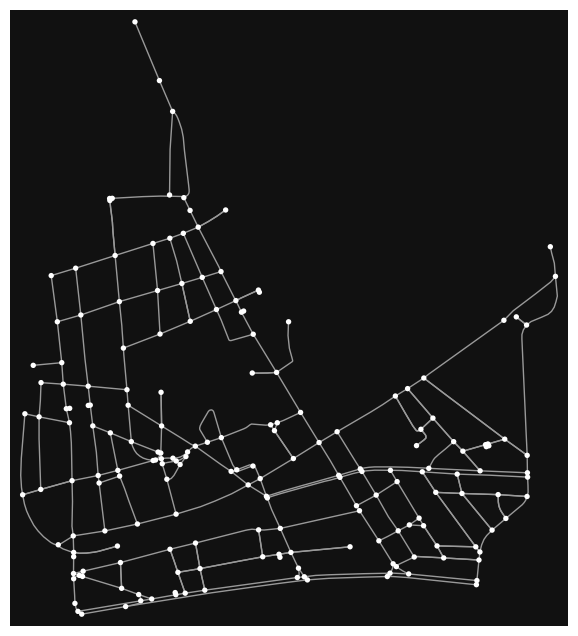

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [145]:
import osmnx as ox

cidade = "Centro, Maceió, Alagoas, Brasil"

grafo = ox.graph_from_place(cidade, network_type='drive')

ox.plot_graph(grafo)

In [146]:
nodes, edges = ox.graph_to_gdfs(grafo.to_undirected())

nodes_df = nodes.reset_index()
edges_df = edges.reset_index()

In [147]:
nodes_df = nodes_df[nodes_df["street_count"] > 1]

print(nodes_df)

           osmid         y          x  street_count highway  \
0      338744483 -9.670583 -35.741767             4     NaN   
1      430590280 -9.665773 -35.734727             3     NaN   
2      430590284 -9.662790 -35.730197             3     NaN   
3      430888008 -9.669120 -35.741883             3     NaN   
4      430888009 -9.670658 -35.741664             3     NaN   
..           ...       ...        ...           ...     ...   
183   8978481526 -9.659582 -35.740899             3     NaN   
184   8980077899 -9.666793 -35.737453             3     NaN   
186   9034345369 -9.669055 -35.736306             3     NaN   
187  12626168576 -9.666102 -35.730632             3     NaN   
190  12856081673 -9.670138 -35.739108             3     NaN   

                       geometry  
0    POINT (-35.74177 -9.67058)  
1    POINT (-35.73473 -9.66577)  
2     POINT (-35.7302 -9.66279)  
3    POINT (-35.74188 -9.66912)  
4    POINT (-35.74166 -9.67066)  
..                          ...  
183  

In [148]:
vertices = list(nodes_df["osmid"])
num_streets = list(nodes_df["street_count"])

print("Número de vértices:", len(vertices))
print("Primeiros 5 vértices:", vertices[:5])
print("Primeiros 5 numeros de ruas nos vértices:", num_streets[:5])

Número de vértices: 177
Primeiros 5 vértices: [338744483, 430590280, 430590284, 430888008, 430888009]
Primeiros 5 numeros de ruas nos vértices: [4, 3, 3, 3, 3]


In [149]:
def get_index_list(arr: list, value):

    for i in range(len(arr)):
        if arr[i] == value:
            return i

    return -1

In [150]:
arestas = []

for i in range(len(edges_df)):
    arestas.append( (int(edges_df['u'][i]), int(edges_df['v'][i]), int(edges_df['length'][i])))


In [151]:
print("Número de arestas:", len(arestas))
print("Primeiras 5 arestas:", arestas[:5])

Número de arestas: 283
Primeiras 5 arestas: [(338744483, 430888009, 14), (338744483, 2657811214, 189), (338744483, 2657811215, 25), (430590280, 431009226, 62), (430590280, 5998668919, 130)]


In [152]:
# Salvar no .txt
with open("input/data2.txt", "w") as f:
    
    n = len(vertices)
    m = len(arestas)
    f.write(f"{n} {m}\n")

    for n in num_streets:
        f.write(f"{n}\n")

    for u, v, w in arestas:
        v1 = get_index_list(vertices, u)
        v2 = get_index_list(vertices, v)


        if (v1 != -1 and v2 != -1):
            f.write(f"{v1} {v2} {w}\n")
    

In [153]:
vertices_cobertura = []
with open("output/out2.txt", "r") as arquivo:
       for linha in arquivo:
           try:
               numero = int(linha.strip())
               print(numero)
               vertices_cobertura.append(vertices[numero])
           except ValueError:
               print(f"A linha '{linha.strip()}' não pode ser convertida para inteiro.")


node_colors = ['red' if node in vertices_cobertura else 'gray' for node in grafo.nodes()]


0
1
8
9
12
19
24
31
37
45
48
49
52
54
58
62
63
72
73
75
78
81
85
86
87
90
91
93
100
103
108
114
115
119
122
133
136
139
146
148
155
157
161
170
172
173
174


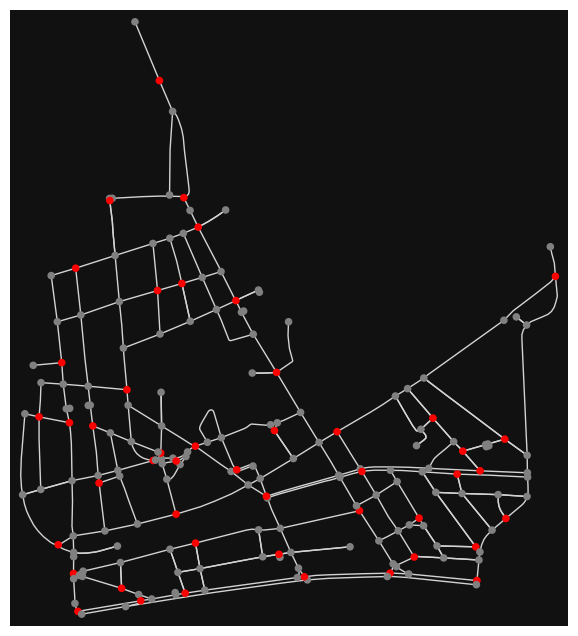

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [154]:
ox.plot_graph(grafo, node_color=node_colors, node_size=30, edge_color="lightgray")

In [34]:
# Este é um PSEUDOCÓDIGO - Não é um simulador completo
# Apenas para ilustrar a lógica
import osmnx as ox
import networkx as nx
import time

# Carrega o grafo do centro de Maceió
place_name = "Centro, Maceió, Alagoas, Brazil"
G = ox.graph_from_place(place_name, network_type='drive')

# Adicionar 'travel_time' como atributo para cada aresta (exemplo simplificado)
# Assumimos uma velocidade média para começar, e o tempo = comprimento / velocidade
default_speed_kmh = 30  # km/h
default_speed_mps = default_speed_kmh / 3.6 # metros/segundo

for u, v, k, data in G.edges(keys=True, data=True):
    length_m = data.get('length', 1) # Garante que a aresta tem comprimento
    data['travel_time'] = length_m / default_speed_mps

# Representação de um veículo
class Vehicle:
    def __init__(self, id, origin_node, dest_node, G_graph):
        self.id = id
        self.current_node = origin_node
        self.dest_node = dest_node
        self.G = G_graph
        self.route = nx.shortest_path(self.G, origin_node, dest_node, weight='travel_time')
        self.current_step_on_route = 0
        self.time_spent_on_edge = 0
        self.current_edge_travel_time = 0
        self.finished = False

    def move(self, dt):
        if self.finished:
            return

        if self.current_step_on_route >= len(self.route) - 1:
            self.finished = True
            print(f"Veículo {self.id} chegou ao destino!")
            return

        next_node_index = self.current_step_on_route + 1
        current_edge_u = self.route[self.current_step_on_route]
        current_edge_v = self.route[next_node_index]

        # Encontrar a aresta (pode haver múltiplas arestas entre os mesmos nós em direções diferentes)
        # Assumindo que o grafo é multidigraph e as arestas são únicas por (u,v,key)
        edge_data = G.get_edge_data(current_edge_u, current_edge_v)
        if edge_data:
            # Pegue a primeira aresta se houver múltiplos com a mesma chave (para simplificar)
            # ou encontre a chave correta
            edge_key = list(edge_data.keys())[0]
            self.current_edge_travel_time = edge_data[edge_key]['travel_time']
        else:
            # Isso pode acontecer se o caminho for de um nó para ele mesmo ou rota inválida
            self.finished = True
            return

        self.time_spent_on_edge += dt

        if self.time_spent_on_edge >= self.current_edge_travel_time:
            self.current_node = current_edge_v
            self.current_step_on_route += 1
            self.time_spent_on_edge = 0 # Reinicia para a próxima aresta
            # O veículo acabou de chegar ao próximo nó, agora ele "começa" a próxima aresta

            if self.current_node == self.dest_node:
                self.finished = True
                print(f"Veículo {self.id} chegou ao destino!")


# Configuração da simulação
simulation_duration = 3600 # 1 hora em segundos
time_step = 10 # segundos por passo de simulação
num_vehicles = 50

vehicles = []
# Crie alguns veículos com origens e destinos aleatórios ou predefinidos
for i in range(num_vehicles):
    # Pega nós aleatórios para origem e destino no grafo
    nodes = list(G.nodes)
    orig_node_sim = nodes[i * 10 % len(nodes)] # Nodos diferentes para cada veiculo
    dest_node_sim = nodes[(i * 10 + 50) % len(nodes)] # Nodos diferentes para cada veiculo

    try:
        vehicle = Vehicle(i, orig_node_sim, dest_node_sim, G)
        vehicles.append(vehicle)
        print(f"Veículo {i} criado. Rota: {vehicle.route}")
    except nx.NetworkXNoPath:
        print(f"Não foi possível criar rota para o veículo {i}. Pulando.")


print("\nIniciando simulação...")
for t in range(0, simulation_duration, time_step):
    if t % 100 == 0:
        print(f"Tempo de simulação: {t}s")
    
    all_finished = True
    for vehicle in vehicles:
        if not vehicle.finished:
            vehicle.move(time_step)
            all_finished = False
    
    if all_finished:
        print("Todos os veículos chegaram aos seus destinos. Fim da simulação antecipado.")
        break
    
    # Adicione uma pequena pausa para ver o progresso (opcional)
    time.sleep(0.1)

print("\nSimulação concluída.")

Veículo 0 criado. Rota: [338744483, 430888009, 722609035, 2657811214, 2657811206, 722609033, 2657811145, 722609038, 722609036, 643432107, 616049630, 1395054633, 2657811149, 606818955]
Não foi possível criar rota para o veículo 1. Pulando.
Veículo 2 criado. Rota: [431009221, 431009219, 1972200402, 625769974, 431009227, 625769969, 431009260, 2657811132, 431009225, 625769972]
Veículo 3 criado. Rota: [431010645, 634716863, 606768926, 645363635, 645363667, 645363666, 431009217, 431009219, 1972200402, 625769974, 7047285653, 5998677735, 616049630, 1395054633, 9034345369, 643432081]
Veículo 4 criado. Rota: [606768860, 645363667, 645363666, 625841613, 625769973, 625769972, 2657811116, 625769969, 431009260, 431009259, 722595637]

Iniciando simulação...
Tempo de simulação: 0s
Tempo de simulação: 100s
Veículo 2 chegou ao destino!
Veículo 4 chegou ao destino!
Veículo 0 chegou ao destino!
Tempo de simulação: 200s
Veículo 3 chegou ao destino!
Todos os veículos chegaram aos seus destinos. Fim da simul

### Simulação
---

In [114]:
indexs = []

l = list(edges_df[edges_df["name"] == "Rua Barão de Atalaia"].index)

l.remove(64)
print(l)

for i in l:
    indexs.append(i)

l = list(edges_df[edges_df["name"] == "Rua do Sol"].index)

l.remove(25)
l.remove(99)
print(l)

for i in l:
    indexs.append(i)

l = list(edges_df[edges_df["name"] == "Ladeira do Brito"].index)

print(l)

for i in l:
    indexs.append(i)

l = list(edges_df[edges_df["name"] == "Rua do Imperador"].index)

print(l)

for i in l:
    indexs.append(i)


[3, 5, 6, 230, 232]
[32, 102, 103, 105]
[100]
[17, 33, 39, 40, 65, 138, 139, 168, 174, 176]


In [115]:
print(edges_df["name"].explode().unique())

['Rua Dias Cabral' 'Avenida da Paz' 'Rua Barão de Atalaia'
 'Rua Marechal Roberto Ferreira' nan 'Avenida Duque de Caxias'
 'Rua Barão de Anadia' 'Rua Buarque de Macêdo'
 'Avenida Deputado Humberto Mendes' 'Rua do Imperador'
 'Praça Marechal Floriano Peixoto' 'Rua Melo Morais'
 'Ladeira dos Martírios' 'Rua do Sol' 'Rua General Hermes'
 'Rua Emanoel Pedro de Farias Costa' 'Rua José Bonifácio'
 'Rua Dois de Dezembro' 'Ladeira Manoel Ramalho de Azevedo'
 'Rua Oliveira e Silva' 'Rua Sete de Setembro' 'Rua Agerson Dantas'
 'Rua Barão de Penedo' 'Rua Zadir Indío' 'Rua Gabino Bezouro'
 'Rua Santos Pacheco' 'Rua Barão de Maceió' 'Rua Doutor Pedro Monteiro'
 'Travessa Dias Cabral' 'Rua Coronel Mendes da Fonseca'
 'Avenida Moreira Lima' 'Rua Dona Rosa da Fonseca'
 'Rua Zacarias de Azevedo' 'Rua Augusta' 'Rua Fernandes de Barros'
 'Rua Barão de Alagoas' 'Rua Cincinato Pinto' 'Rua do Comércio'
 'Ladeira do Brito' 'Beco São José' 'Rua do Livramento'
 'Rua Comendador Teixeira Bastos' 'Avenida Vieira 

(430590284, 2574513689)


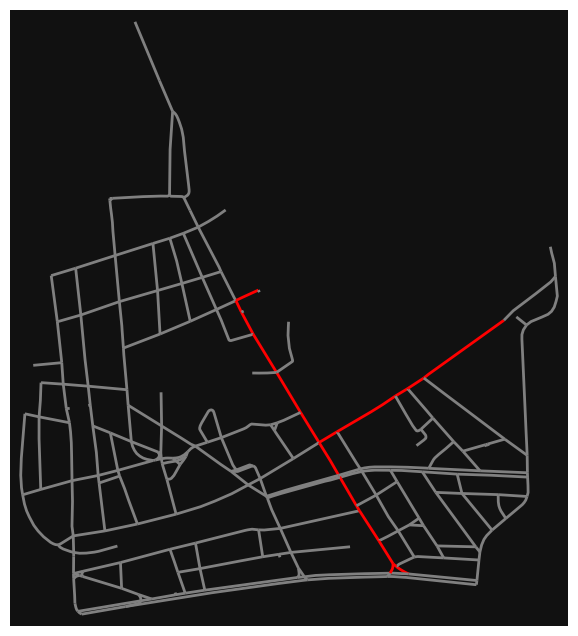

In [161]:
cidade = "Centro, Maceió, Alagoas, Brasil"
grafo = ox.graph_from_place(cidade, network_type='drive')

G = grafo.to_undirected()

arestas_destaque = []

for i in indexs:
    arestas_destaque.append(list(G.edges())[i])
    
print(arestas_destaque[2])

edge_colors = ['red' if edge in arestas_destaque or (edge[1], edge[0]) in arestas_destaque else 'gray' for edge in G.edges()]

fig, ax = ox.plot_graph(G, edge_color=edge_colors, edge_linewidth=2, node_size=0)

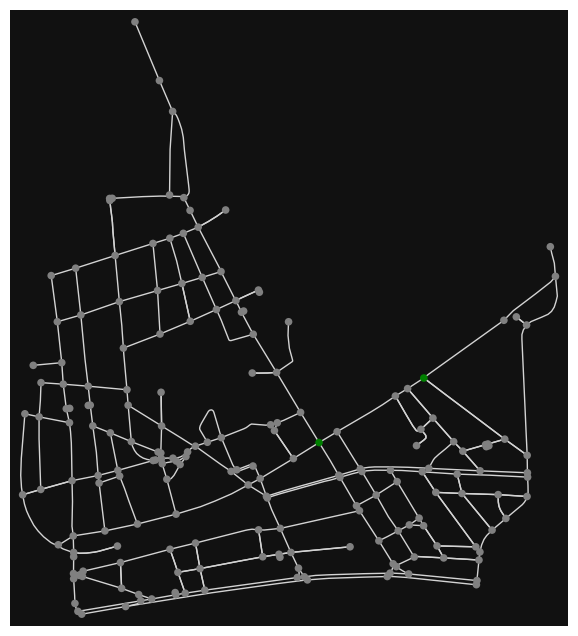

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [169]:
# chegada vertice de destino - 7258919449
# inicio do veiculo - 430590284, 1395054649
vertices_semaforo = [431009226, 2574513689]

node_colors = ['green' if node in vertices_semaforo else 'gray' for node in grafo.nodes()]

ox.plot_graph(grafo, node_color=node_colors, node_size=30, edge_color="lightgray")


In [201]:
import osmnx as ox
import networkx as nx
import time

# Configuração do Arquivo de Saída
output_filename = "output/simulation1.txt"
output_file = open(output_filename, "w")

def print_to_file(message):
    print(message)
    output_file.write(message + "\n")

# Variável global para rastrear veículos esperando nos semáforos
# Formato: {node_id_semaforo: {edge_tuple: [vehicle_id1, vehicle_id2, ...]}}
vehicles_at_nodes = {}

# Setup do Grafo
print_to_file("Carregando o grafo do centro de Maceió...")
place_name = "Centro, Maceió, Alagoas, Brazil"
try:
    G = ox.graph_from_place(place_name, network_type='drive')
except Exception as e:
    print_to_file(f"Erro ao obter o grafo por nome: {e}")
    point = (-9.6644, -35.7354)
    G = ox.graph_from_point(point, dist=1500, network_type='drive')
print_to_file("Grafo carregado.")

# Adicionar 'travel_time' como atributo para cada aresta
default_speed_kmh = 30  # km/h
default_speed_mps = default_speed_kmh / 3.6 # metros/segundo

for u, v, k, data in G.edges(keys=True, data=True):
    length_m = data.get('length', 1)
    data['travel_time'] = length_m / default_speed_mps

# Modelagem do Semáforo
class TrafficLight:
    def __init__(self, node_id, G_graph):
        self.node_id = node_id
        self.G = G_graph
        
        self.incoming_edges_to_node = []
        for u, v, k, data in self.G.in_edges(self.node_id, keys=True, data=True):
            self.incoming_edges_to_node.append((u, v, k))

        if not self.incoming_edges_to_node:
            print_to_file(f"AVISO: Semáforo no nó {self.node_id} não tem arestas de entrada. Pode não funcionar como esperado.")
            self.phase_cycle_definitions = [{'green_edges': [], 'phase_id': 0}]
            return

        self.phase_cycle_definitions = []
        
        # Não podem ter verde ao mesmo tempo e compatíveis.
        # Exemplo simples: duas fases (se houver pelo menos 2 arestas)
        if len(self.incoming_edges_to_node) > 1:
            mid_point = len(self.incoming_edges_to_node) // 2
            self.phase_cycle_definitions.append({'green_edges': self.incoming_edges_to_node[:mid_point], 'phase_id': 0})
            self.phase_cycle_definitions.append({'green_edges': self.incoming_edges_to_node[mid_point:], 'phase_id': 1})
        else:
            self.phase_cycle_definitions.append({'green_edges': self.incoming_edges_to_node, 'phase_id': 0})

        self.current_phase_index = 0
        self.time_in_current_phase = 0
        self.min_green_time = 10 
        self.max_green_time = 90 
        self.yellow_time = 3 
        self.is_yellow = False
        self.yellow_timer = 0
        self.current_green_duration = self.min_green_time

        # Recalcular a duração inicial para a primeira fase imediatamente
        self._recalculate_next_phase_duration()


    def update(self, dt):
        self.time_in_current_phase += dt
        
        if self.is_yellow:
            self.yellow_timer += dt
            if self.yellow_timer >= self.yellow_time:
                self.is_yellow = False
                self.yellow_timer = 0
                # Mudar para a próxima fase "verde"
                self.current_phase_index = (self.current_phase_index + 1) % len(self.phase_cycle_definitions)
                self.time_in_current_phase = 0
                
                
                self._recalculate_next_phase_duration()
            return

        if self.time_in_current_phase >= self.current_green_duration:
            self.is_yellow = True
            print_to_file(f"Semáforo no nó {self.node_id} mudou para AMARELO. Tempo na fase verde: {self.current_green_duration:.2f}s.")
            

    def _recalculate_next_phase_duration(self):
        """
        Heurística de Equalização de Filas:
        Calcula a duração da próxima fase com base na proporção da demanda total
        de veículos esperando em todas as fases no semáforo.
        """
        # Obter a demanda atual de todas as fases neste semáforo
        all_phase_demands = {}
        total_vehicles_waiting_at_intersection = 0

        for i, phase_def in enumerate(self.phase_cycle_definitions):
            phase_demand = 0
            for edge_tuple in phase_def['green_edges']:
                if self.node_id in vehicles_at_nodes and edge_tuple in vehicles_at_nodes[self.node_id]:
                    phase_demand += len(vehicles_at_nodes[self.node_id][edge_tuple])
            
            all_phase_demands[i] = phase_demand
            total_vehicles_waiting_at_intersection += phase_demand

        # Se não há veículos esperando em nenhuma direção, usa o tempo mínimo
        if total_vehicles_waiting_at_intersection == 0:
            self.current_green_duration = self.min_green_time
            print_to_file(f"Semáforo no nó {self.node_id}: Nenhuma demanda. Duração da fase {self.current_phase_index + 1} -> {self.current_green_duration:.2f}s")
            return

        # Calcular a duração da próxima fase
        next_phase_demand = all_phase_demands[self.current_phase_index]
        
        # Fórmula de Equalização de Filas
        if next_phase_demand == 0:
            calculated_duration = self.min_green_time
        else:
            proportional_duration = (next_phase_demand / total_vehicles_waiting_at_intersection) * self.max_green_time
            calculated_duration = self.min_green_time + proportional_duration
            
        self.current_green_duration = max(self.min_green_time, min(self.max_green_time, calculated_duration))
        
        print_to_file(f"Semáforo no nó {self.node_id}: Nova duração da fase {self.current_phase_index + 1} (demanda: {next_phase_demand}, total: {total_vehicles_waiting_at_intersection}) -> {self.current_green_duration:.2f}s")


    def is_green(self, incoming_edge_u, incoming_edge_v, incoming_edge_k):
        if self.is_yellow:
            return False

        current_phase_definition = self.phase_cycle_definitions[self.current_phase_index]
        return (incoming_edge_u, incoming_edge_v, incoming_edge_k) in current_phase_definition['green_edges']

# Representação de um Veículo
class Vehicle:
    def __init__(self, id, origin_node, dest_node, G_graph, traffic_lights):
        self.id = id
        self.current_node = origin_node
        self.dest_node = dest_node
        self.G = G_graph
        self.traffic_lights = traffic_lights
        try:
            self.route = nx.shortest_path(self.G, origin_node, dest_node, weight='travel_time')
        except nx.NetworkXNoPath:
            self.route = None
            self.finished = True
            print_to_file(f"AVISO: Veículo {self.id} não conseguiu encontrar rota de {origin_node} para {dest_node}. Ignorando.")
            return

        self.current_step_on_route = 0
        self.time_spent_on_edge = 0
        self.current_edge_travel_time = 0
        self.finished = False
        self.waiting_at_light = False
        self.wait_time = 0

        self._set_next_edge_info()

    def _set_next_edge_info(self):
        if self.route is None or self.current_step_on_route >= len(self.route) - 1:
            self.next_edge_u = None
            self.next_edge_v = None
            self.next_edge_k = None
            self.current_edge_travel_time = 0
            return

        self.next_edge_u = self.route[self.current_step_on_route]
        self.next_edge_v = self.route[self.current_step_on_route + 1]

        edge_data = self.G.get_edge_data(self.next_edge_u, self.next_edge_v)
        if edge_data:
            self.next_edge_k = list(edge_data.keys())[0]
            self.current_edge_travel_time = edge_data[self.next_edge_k].get('travel_time', 0.001)
        else:
            self.next_edge_k = None
            self.current_edge_travel_time = 0.001
            print_to_file(f"AVISO: Aresta {self.next_edge_u}-{self.next_edge_v} não encontrada no grafo para veículo {self.id}")


    def move(self, dt):
        if self.finished:
            return

        if self.current_step_on_route >= len(self.route) - 1:
            self.finished = True
            print_to_file(f"Veículo {self.id} chegou ao destino! Tempo de espera total: {self.wait_time:.2f}s")
            # Ao chegar ao destino, certifique-se de que o veículo não está mais na lista de espera.
            if self.waiting_at_light:
                incoming_edge = (self.next_edge_u, self.next_edge_v, self.next_edge_k)
                
                if self.next_edge_v in vehicles_at_nodes and \
                   incoming_edge in vehicles_at_nodes[self.next_edge_v] and \
                   self.id in vehicles_at_nodes[self.next_edge_v][incoming_edge]:
                    
                    vehicles_at_nodes[self.next_edge_v][incoming_edge].remove(self.id)
                    if not vehicles_at_nodes[self.next_edge_v][incoming_edge]:
                        del vehicles_at_nodes[self.next_edge_v][incoming_edge]
                    if not vehicles_at_nodes[self.next_edge_v]:
                        del vehicles_at_nodes[self.next_edge_v]
            return

        if self.next_edge_v in self.traffic_lights:
            light = self.traffic_lights[self.next_edge_v]
            incoming_edge = (self.next_edge_u, self.next_edge_v, self.next_edge_k)

            if not light.is_green(self.next_edge_u, self.next_edge_v, self.next_edge_k):
                if not self.waiting_at_light:
                    if self.next_edge_v not in vehicles_at_nodes:
                        vehicles_at_nodes[self.next_edge_v] = {}
                    if incoming_edge not in vehicles_at_nodes[self.next_edge_v]:
                        vehicles_at_nodes[self.next_edge_v][incoming_edge] = []
                    vehicles_at_nodes[self.next_edge_v][incoming_edge].append(self.id)
                    
                    self.waiting_at_light = True
                self.wait_time += dt
                return
            else:
                if self.waiting_at_light:
                    if self.next_edge_v in vehicles_at_nodes and \
                       incoming_edge in vehicles_at_nodes[self.next_edge_v] and \
                       self.id in vehicles_at_nodes[self.next_edge_v][incoming_edge]:
                        vehicles_at_nodes[self.next_edge_v][incoming_edge].remove(self.id)
                        if not vehicles_at_nodes[self.next_edge_v][incoming_edge]:
                            del vehicles_at_nodes[self.next_edge_v][incoming_edge]
                        if not vehicles_at_nodes[self.next_edge_v]:
                            del vehicles_at_nodes[self.next_edge_v]

                    self.waiting_at_light = False

        self.time_spent_on_edge += dt

        if self.time_spent_on_edge >= self.current_edge_travel_time:
            self.current_node = self.next_edge_v
            self.current_step_on_route += 1
            self.time_spent_on_edge = 0

            self._set_next_edge_info()

            if self.current_node == self.dest_node:
                self.finished = True
                print_to_file(f"Veículo {self.id} chegou ao destino! Tempo de espera total: {self.wait_time:.2f}s")


# Configuração da Simulação
simulation_duration = 3600
time_step = 5 
num_vehicles = 200

# Semáforos
vertices_semaforo = [431009226, 2574513689]
nodes_with_lights = vertices_semaforo
print_to_file(f"\nNós selecionados para semáforos (especificados): {nodes_with_lights}")

traffic_lights = {}

for node_id in nodes_with_lights:
    if node_id not in G.nodes:
        print_to_file(f"AVISO: Nó {node_id} especificado para semáforo não encontrado no grafo. Pulando.")
        continue

    traffic_lights[node_id] = TrafficLight(node_id, G)
    print_to_file(f"Semáforo configurado no nó {node_id}.")

# Origens e destino fixos para os veículos
origins_for_vehicles = [430590284, 1395054649]
destination_for_vehicles = 7258919449

vehicles = []
vehicle_id_counter = 0
vehicle_path = 0

print_to_file(f"\nCriando {num_vehicles} veículos com origens em {origins_for_vehicles} e destino em {destination_for_vehicles}...")
while len(vehicles) < num_vehicles:
    
    if len(vehicles) >= num_vehicles:
        break
    
    if vehicle_path < 50:
        
        vehicle = Vehicle(vehicle_id_counter, origins_for_vehicles[0], destination_for_vehicles, G, traffic_lights)
        if not vehicle.finished:
            vehicles.append(vehicle)
            vehicle_id_counter += 1
            vehicle_path += 1
        else:
            print_to_file(f"Veículo {vehicle_id_counter} não adicionado (origem {origins_for_vehicles[0]}) devido a problemas na rota.")
            vehicle_id_counter += 1
    
    else:
        vehicle = Vehicle(vehicle_id_counter, origins_for_vehicles[1], destination_for_vehicles, G, traffic_lights)
        if not vehicle.finished:
            vehicles.append(vehicle)
            vehicle_id_counter += 1
            vehicle_path += 1
        else:
            print_to_file(f"Veículo {vehicle_id_counter} não adicionado (origem {origins_for_vehicles[1]}) devido a problemas na rota.")
            vehicle_id_counter += 1

# Loop de Simulação
print_to_file("\nIniciando simulação com semáforos com heurística de equalização de filas...")
active_vehicles = len(vehicles)

for t in range(0, simulation_duration, time_step):
    if t % 60 == 0:
        print_to_file(f"\n--- Tempo de simulação: {t}s ({t/60:.0f} min) ---")

    for light_id, light_obj in traffic_lights.items():
        light_obj.update(time_step)

    vehicles_finished_this_step = 0
    for vehicle in vehicles:
        if not vehicle.finished:
            vehicle.move(time_step)
            if vehicle.finished:
                vehicles_finished_this_step += 1
    
    if vehicles_finished_this_step > 0:
        active_vehicles -= vehicles_finished_this_step
        print_to_file(f"{vehicles_finished_this_step} veículos chegaram ao destino. Restam {active_vehicles} ativos.")

    if active_vehicles == 0:
        print_to_file("Todos os veículos chegaram aos seus destinos. Fim da simulação antecipado.")
        break
    
print_to_file("\nSimulação concluída.")

total_wait_time = sum(v.wait_time for v in vehicles if v.finished)
total_vehicles_finished = len([v for v in vehicles if v.finished])
if total_vehicles_finished > 0:
    avg_wait_time = total_wait_time / total_vehicles_finished
    print_to_file(f"\n--- Resumo da Simulação ---")
    print_to_file(f"Total de veículos que chegaram: {total_vehicles_finished}")
    print_to_file(f"Tempo de espera total acumulado: {total_wait_time:.2f}s")
    print_to_file(f"Tempo de espera médio por veículo: {avg_wait_time:.2f}s")
else:
    print_to_file(f"\n--- Resumo da Simulação ---")
    print_to_file("Nenhum veículo conseguiu chegar ao destino.")

output_file.close()
print(f"\nSimulação gravada em '{output_filename}'")

Carregando o grafo do centro de Maceió...
Grafo carregado.

Nós selecionados para semáforos (especificados): [431009226, 2574513689]
Semáforo no nó 431009226: Nenhuma demanda. Duração da fase 1 -> 10.00s
Semáforo configurado no nó 431009226.
Semáforo no nó 2574513689: Nenhuma demanda. Duração da fase 1 -> 10.00s
Semáforo configurado no nó 2574513689.

Criando 200 veículos com origens em [430590284, 1395054649] e destino em 7258919449...

Iniciando simulação com semáforos com heurística de equalização de filas...

--- Tempo de simulação: 0s (0 min) ---
Semáforo no nó 431009226 mudou para AMARELO. Tempo na fase verde: 10.00s.
Semáforo no nó 2574513689 mudou para AMARELO. Tempo na fase verde: 10.00s.
Semáforo no nó 431009226: Nenhuma demanda. Duração da fase 2 -> 10.00s
Semáforo no nó 2574513689: Nova duração da fase 2 (demanda: 0, total: 50) -> 10.00s
Semáforo no nó 431009226 mudou para AMARELO. Tempo na fase verde: 10.00s.
Semáforo no nó 2574513689 mudou para AMARELO. Tempo na fase verd

In [ ]:
import osmnx as ox
import networkx as nx
import time
import random # Importar random, caso removido anteriormente

# --- Configuração do Arquivo de Saída ---
output_filename = "output/simulation2.txt"
output_file = open(output_filename, "w")

def print_to_file(message):
    """
    Função auxiliar para imprimir mensagens no console e no arquivo.
    """
    print(message)
    output_file.write(message + "\n")

vehicles_at_nodes = {}

# Setup do Grafo 
print_to_file("Carregando o grafo do centro de Maceió...")
place_name = "Centro, Maceió, Alagoas, Brazil"
try:
    G = ox.graph_from_place(place_name, network_type='drive')
except Exception as e:
    print_to_file(f"Erro ao obter o grafo por nome: {e}")
    point = (-9.6644, -35.7354) # Coordenadas aproximadas do centro de Maceió
    G = ox.graph_from_point(point, dist=1500, network_type='drive')
print_to_file("Grafo carregado.")

# Adicionar tempo de viagem como atributo para cada aresta
default_speed_kmh = 30
default_speed_mps = default_speed_kmh / 3.6

for u, v, k, data in G.edges(keys=True, data=True):
    length_m = data.get('length', 1)
    data['travel_time'] = length_m / default_speed_mps

# Modelagem do Semáforo 
class TrafficLight:
    def __init__(self, node_id, G_graph):
        self.node_id = node_id
        self.G = G_graph
        
        # Semáforo dinamicamente
        self.incoming_edges_to_node = []
        for u, v, k, data in self.G.in_edges(self.node_id, keys=True, data=True):
            self.incoming_edges_to_node.append((u, v, k))

        if not self.incoming_edges_to_node:
            print_to_file(f"AVISO: Semáforo no nó {self.node_id} não tem arestas de entrada. Pode não funcionar como esperado.")
            self.phase_cycle_definitions = [{'green_edges': [], 'phase_id': 0}]
            return

        self.phase_cycle_definitions = []
        
        # Exemplo simples: duas fases (se houver pelo menos 2 arestas)
        if len(self.incoming_edges_to_node) > 1:
            mid_point = len(self.incoming_edges_to_node) // 2
            self.phase_cycle_definitions.append({'green_edges': self.incoming_edges_to_node[:mid_point], 'phase_id': 0})
            self.phase_cycle_definitions.append({'green_edges': self.incoming_edges_to_node[mid_point:], 'phase_id': 1})
        else:
            self.phase_cycle_definitions.append({'green_edges': self.incoming_edges_to_node, 'phase_id': 0})

        self.current_phase_index = 0
        self.time_in_current_phase = 0
        self.min_green_time = 10
        self.max_green_time = 90 
        self.yellow_time = 3
        self.is_yellow = False
        self.yellow_timer = 0
        self.current_green_duration = self.min_green_time

        # Recalcular a duração inicial para a primeira fase imediatamente
        self._recalculate_next_phase_duration()


    def update(self, dt):
        """
        Atualiza o estado do semáforo.
        """
        self.time_in_current_phase += dt
        
        # Adicionar dt ao tempo de espera dos veículos nas filas do semáforo
        if self.node_id in vehicles_at_nodes:
            for edge_tuple in vehicles_at_nodes[self.node_id]:
                for vehicle_info in vehicles_at_nodes[self.node_id][edge_tuple]:
                    vehicle_info['wait_time_on_edge'] += dt

        if self.is_yellow:
            self.yellow_timer += dt
            if self.yellow_timer >= self.yellow_time:
                self.is_yellow = False
                self.yellow_timer = 0
                self.current_phase_index = (self.current_phase_index + 1) % len(self.phase_cycle_definitions)
                self.time_in_current_phase = 0
                
                # HEURÍSTICA DE TEMPO
                self._recalculate_next_phase_duration()
            return

        if self.time_in_current_phase >= self.current_green_duration:
            self.is_yellow = True
            print_to_file(f"Semáforo no nó {self.node_id} mudou para AMARELO. Tempo na fase verde: {self.current_green_duration:.2f}s.")

    def _recalculate_next_phase_duration(self):
        """
        Heurística de Adaptação pelo Tempo de Espera:
        Calcula a duração da próxima fase com base no tempo de espera acumulado dos veículos
        em cada grupo de arestas.
        """
        all_phase_weighted_demands = {}
        total_weighted_demand_at_intersection = 0

        for i, phase_def in enumerate(self.phase_cycle_definitions):
            phase_weighted_demand = 0
            for edge_tuple in phase_def['green_edges']:
                if self.node_id in vehicles_at_nodes and edge_tuple in vehicles_at_nodes[self.node_id]:
                    for vehicle_info in vehicles_at_nodes[self.node_id][edge_tuple]:
                        phase_weighted_demand += vehicle_info['wait_time_on_edge']
            
            all_phase_weighted_demands[i] = phase_weighted_demand
            total_weighted_demand_at_intersection += phase_weighted_demand

        if total_weighted_demand_at_intersection == 0:
            self.current_green_duration = self.min_green_time
            print_to_file(f"Semáforo no nó {self.node_id}: Nenhuma demanda ponderada. Duração da fase {self.current_phase_index + 1} -> {self.current_green_duration:.2f}s")
            return

        # Calcular a duração da próxima fase com base na demanda ponderada
        next_phase_weighted_demand = all_phase_weighted_demands[self.current_phase_index]
        
        # Propocional = (Demanda Ponderada da Fase / Demanda Ponderada Total) * (Tempo Máximo do Ciclo Ajustável)
        # O self.max_green_time serve como um "orçamento" de tempo máximo para distribuir.
        
        if next_phase_weighted_demand == 0:
            calculated_duration = self.min_green_time
        else:
            proportional_duration = (next_phase_weighted_demand / total_weighted_demand_at_intersection) * self.max_green_time
            calculated_duration = self.min_green_time + proportional_duration
            
        self.current_green_duration = max(self.min_green_time, min(self.max_green_time, calculated_duration))
        
        print_to_file(f"Semáforo no nó {self.node_id}: Nova duração da fase {self.current_phase_index + 1} (dem. ponderada: {next_phase_weighted_demand:.2f}, total: {total_weighted_demand_at_intersection:.2f}) -> {self.current_green_duration:.2f}s")


    def is_green(self, incoming_edge_u, incoming_edge_v, incoming_edge_k):
        """
        Verifica se uma aresta de entrada específica está verde na fase atual.
        """
        if self.is_yellow:
            return False # Nenhuma aresta está verde durante a fase amarela

        current_phase_definition = self.phase_cycle_definitions[self.current_phase_index]
        return (incoming_edge_u, incoming_edge_v, incoming_edge_k) in current_phase_definition['green_edges']

# Representação de um Veículo 

class Vehicle:
    def __init__(self, id, origin_node, dest_node, G_graph, traffic_lights):
        self.id = id
        self.current_node = origin_node
        self.dest_node = dest_node
        self.G = G_graph
        self.traffic_lights = traffic_lights
        try:
            self.route = nx.shortest_path(self.G, origin_node, dest_node, weight='travel_time')
        except nx.NetworkXNoPath:
            self.route = None
            self.finished = True
            print_to_file(f"AVISO: Veículo {self.id} não conseguiu encontrar rota de {origin_node} para {dest_node}. Ignorando.")
            return

        self.current_step_on_route = 0
        self.time_spent_on_edge = 0
        self.current_edge_travel_time = 0
        self.finished = False
        self.waiting_at_light = False
        self.wait_time = 0

        # Pre-calcula a próxima aresta no início para verificar o semáforo antes do primeiro movimento
        self._set_next_edge_info()

    def _set_next_edge_info(self):
        if self.route is None or self.current_step_on_route >= len(self.route) - 1:
            self.next_edge_u = None
            self.next_edge_v = None
            self.next_edge_k = None
            self.current_edge_travel_time = 0
            return

        self.next_edge_u = self.route[self.current_step_on_route]
        self.next_edge_v = self.route[self.current_step_on_route + 1]

        edge_data = self.G.get_edge_data(self.next_edge_u, self.next_edge_v)
        if edge_data:
            self.next_edge_k = list(edge_data.keys())[0] # primeira aresta que vier
            self.current_edge_travel_time = edge_data[self.next_edge_k].get('travel_time', 0.001)
        else:
            self.next_edge_k = None
            self.current_edge_travel_time = 0.001
            print_to_file(f"AVISO: Aresta {self.next_edge_u}-{self.next_edge_v} não encontrada no grafo para veículo {self.id}")


    def move(self, dt):
        if self.finished:
            return

        # Chegou ao destino?
        if self.current_step_on_route >= len(self.route) - 1:
            self.finished = True
            print_to_file(f"Veículo {self.id} chegou ao destino! Tempo de espera total: {self.wait_time:.2f}s")
            
            if self.waiting_at_light:
                incoming_edge = (self.next_edge_u, self.next_edge_v, self.next_edge_k)
                if self.next_edge_v in vehicles_at_nodes and incoming_edge in vehicles_at_nodes[self.next_edge_v]:
                    vehicles_at_nodes[self.next_edge_v][incoming_edge] = [
                        v_info for v_info in vehicles_at_nodes[self.next_edge_v][incoming_edge]
                        if v_info['vehicle_id'] != self.id
                    ]
                    if not vehicles_at_nodes[self.next_edge_v][incoming_edge]:
                        del vehicles_at_nodes[self.next_edge_v][incoming_edge]
                    if not vehicles_at_nodes[self.next_edge_v]:
                        del vehicles_at_nodes[self.next_edge_v]
            return

        # Verificar semáforo no nó de destino da aresta atual (próximo nó)
        if self.next_edge_v in self.traffic_lights:
            light = self.traffic_lights[self.next_edge_v]
            
            # A aresta de entrada que o veículo está bloqueando
            incoming_edge = (self.next_edge_u, self.next_edge_v, self.next_edge_k)

            if not light.is_green(self.next_edge_u, self.next_edge_v, self.next_edge_k):
                if not self.waiting_at_light:
                    
                    if self.next_edge_v not in vehicles_at_nodes:
                        vehicles_at_nodes[self.next_edge_v] = {}
                    if incoming_edge not in vehicles_at_nodes[self.next_edge_v]:
                        vehicles_at_nodes[self.next_edge_v][incoming_edge] = []
                    
                    
                    vehicles_at_nodes[self.next_edge_v][incoming_edge].append({'vehicle_id': self.id, 'wait_time_on_edge': 0.0})
                    
                    self.waiting_at_light = True
                self.wait_time += dt # Acumula tempo de espera
                return
            else:
                if self.waiting_at_light: # Acabou de sair da espera (luz verde)
                    # Remove o veículo da lista de espera do nó e aresta
                    if self.next_edge_v in vehicles_at_nodes and \
                       incoming_edge in vehicles_at_nodes[self.next_edge_v]:
                        vehicles_at_nodes[self.next_edge_v][incoming_edge] = [
                            v_info for v_info in vehicles_at_nodes[self.next_edge_v][incoming_edge]
                            if v_info['vehicle_id'] != self.id
                        ]
                        if not vehicles_at_nodes[self.next_edge_v][incoming_edge]:
                            del vehicles_at_nodes[self.next_edge_v][incoming_edge]
                        if not vehicles_at_nodes[self.next_edge_v]:
                            del vehicles_at_nodes[self.next_edge_v]

                    self.waiting_at_light = False

        # Se não está esperando no semáforo, avança
        self.time_spent_on_edge += dt

        if self.time_spent_on_edge >= self.current_edge_travel_time:
            self.current_node = self.next_edge_v
            self.current_step_on_route += 1
            self.time_spent_on_edge = 0

            # Atualiza informações da próxima aresta se não for o destino final
            self._set_next_edge_info()

            if self.current_node == self.dest_node:
                self.finished = True
                print_to_file(f"Veículo {self.id} chegou ao destino! Tempo de espera total: {self.wait_time:.2f}s")


# Configuração da Simulação
simulation_duration = 3600
time_step = 5 
num_vehicles = 200

# Semáforos
vertices_semaforo = [431009226, 2574513689]
nodes_with_lights = vertices_semaforo
print_to_file(f"\nNós selecionados para semáforos (especificados): {nodes_with_lights}")

# Dicionário para armazenar os objetos TrafficLight
traffic_lights = {}

for node_id in nodes_with_lights:
    # O semáforo agora recebe o grafo para definir suas fases
    if node_id not in G.nodes:
        print_to_file(f"AVISO: Nó {node_id} especificado para semáforo não encontrado no grafo. Pulando.")
        continue
    traffic_lights[node_id] = TrafficLight(node_id, G) 
    print_to_file(f"Semáforo configurado no nó {node_id}.")

# Definir origens e destino fixos para veículos
origins_for_vehicles = [430590284, 1395054649]
destination_for_vehicles = 7258919449

vehicles = []
vehicle_id_counter = 0

# Criar veículos com as origens e destino especificados
while len(vehicles) < num_vehicles:
    
    if len(vehicles) >= num_vehicles:
        break
    
    if vehicle_path < 50:
        
        vehicle = Vehicle(vehicle_id_counter, origins_for_vehicles[0], destination_for_vehicles, G, traffic_lights)
        if not vehicle.finished:
            vehicles.append(vehicle)
            vehicle_id_counter += 1
            vehicle_path += 1
        else:
            print_to_file(f"Veículo {vehicle_id_counter} não adicionado (origem {origins_for_vehicles[0]}) devido a problemas na rota.")
            vehicle_id_counter += 1
    
    else:
        vehicle = Vehicle(vehicle_id_counter, origins_for_vehicles[1], destination_for_vehicles, G, traffic_lights)
        if not vehicle.finished:
            vehicles.append(vehicle)
            vehicle_id_counter += 1
            vehicle_path += 1
        else:
            print_to_file(f"Veículo {vehicle_id_counter} não adicionado (origem {origins_for_vehicles[1]}) devido a problemas na rota.")
            vehicle_id_counter += 1


# Loop de Simulação
print_to_file("\nIniciando simulação com semáforos com heurística de adaptação pelo tempo de espera...")
active_vehicles = len(vehicles)

for t in range(0, simulation_duration, time_step):
    
    if t % 60 == 0:
        print_to_file(f"\n--- Tempo de simulação: {t}s ({t/60:.0f} min) ---")

    # 1. Atualizar todos os semáforos
    for light_id, light_obj in traffic_lights.items():
        light_obj.update(time_step) # Incrementa o tempo de espera das filas

    # 2. Mover todos os veículos ativos
    vehicles_finished_this_step = 0
    for vehicle in vehicles:
        if not vehicle.finished:
            vehicle.move(time_step)
            if vehicle.finished:
                vehicles_finished_this_step += 1
    
    if vehicles_finished_this_step > 0:
        active_vehicles -= vehicles_finished_this_step
        print_to_file(f"{vehicles_finished_this_step} veículos chegaram ao destino. Restam {active_vehicles} ativos.")

    if active_vehicles == 0:
        print_to_file("Todos os veículos chegaram aos seus destinos. Fim da simulação antecipado.")
        break
    
    # Opcional
    #time.sleep(0.01) # Reduzido para não atrasar muito

print_to_file("\nSimulação concluída.")

# Metricas
total_wait_time = sum(v.wait_time for v in vehicles if v.finished)
total_vehicles_finished = len([v for v in vehicles if v.finished])
if total_vehicles_finished > 0:
    avg_wait_time = total_wait_time / total_vehicles_finished
    print_to_file(f"\n--- Resumo da Simulação ---")
    print_to_file(f"Total de veículos que chegaram: {total_vehicles_finished}")
    print_to_file(f"Tempo de espera total acumulado: {total_wait_time:.2f}s")
    print_to_file(f"Tempo de espera médio por veículo: {avg_wait_time:.2f}s")
else:
    print_to_file(f"\n--- Resumo da Simulação ---")
    print_to_file("Nenhum veículo conseguiu chegar ao destino.")

output_file.close()
print(f"\nSimulação gravada em '{output_filename}'")

Carregando o grafo do centro de Maceió...
Grafo carregado.

Nós selecionados para semáforos (especificados): [431009226, 2574513689]
Semáforo no nó 431009226: Nenhuma demanda ponderada. Duração da fase 1 -> 10.00s
Semáforo configurado no nó 431009226.
Semáforo no nó 2574513689: Nenhuma demanda ponderada. Duração da fase 1 -> 10.00s
Semáforo configurado no nó 2574513689.

Iniciando simulação com semáforos com heurística de adaptação pelo tempo de espera...

--- Tempo de simulação: 0s (0 min) ---
Semáforo no nó 431009226 mudou para AMARELO. Tempo na fase verde: 10.00s.
Semáforo no nó 2574513689 mudou para AMARELO. Tempo na fase verde: 10.00s.
Semáforo no nó 431009226: Nenhuma demanda ponderada. Duração da fase 2 -> 10.00s
Semáforo no nó 2574513689: Nenhuma demanda ponderada. Duração da fase 2 -> 10.00s
Semáforo no nó 431009226 mudou para AMARELO. Tempo na fase verde: 10.00s.
Semáforo no nó 2574513689 mudou para AMARELO. Tempo na fase verde: 10.00s.
Semáforo no nó 431009226: Nenhuma deman